<a href="https://colab.research.google.com/github/KehEatCode/Projects/blob/main/TimeSeries_Canadian_Oil_Production_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------------------------------------------------------------------
# **Crude Oil Production Forecasting**
-----------------------------------------------------------------------------------------------------------------------

----------------
## **Context** 
----------------

The world economy relies heavily on hydrocarbons, particularly oil, for the provision of energy required in transportation and other industries. Crude oil production is considered one of the most important indicators of the global economy. Dependence on oil and its finite nature, pose some complex problems including estimation of future production patterns. 

Crude oil production forecasting is an important input into the decision-making process and investment scenario evaluation, which are crucial for oil-producing countries. Governments and businesses spend a lot of time and resources figuring out the production forecast that can help to identify opportunities and decide on the best way forward.

------------------
## **Objective**
------------------

We will analyze and use historical oil production data for Canada from 1992 to 2018 to forecast its future production. We need to build a time series forecasting model using AR, MA, ARMA and ARIMA models to predict oil production.


## **Importing libraries**

In [ ]:
# !pip install statsmodels == 0.12.1

In [ ]:
# !pip install pmdarima

In [ ]:
# Version check 
import statsmodels

statsmodels.__version__

'0.12.2'

In [ ]:
# Libraries to do data manipulation
import numpy as np

import pandas as pd

# Library to do data visualization
import matplotlib.pyplot as plt

# Library to do time series decomposition
import statsmodels.api as sm

# Module to create ACF and PACF plots
from statsmodels.graphics import tsaplots

# Module to build AR, MA, ARMA, and ARIMA models
from statsmodels.tsa.arima.model import ARIMA

# Module to implement MSE and RSME during model evaluation
from sklearn.metrics import mean_squared_error

# Code for ignoring unnecessary warnings while executing some code  
import warnings
warnings.filterwarnings("ignore")

## **Loading the dataset**

This dataset has crude oil production data as time series for 222 countries starting from 1992 till 2018. This is a time series data with yearly frequency. Since the frequency of this dataset is yearly, we will not get any seasonal patterns in this time series. However, we can expect cyclicity in the data which spans over multiple years.

**Let's load the dataset**

In [ ]:
from google.colab import files
upload = files.upload()

Saving Crude+Oil+Production+by+Country (1).csv to Crude+Oil+Production+by+Country (1).csv


In [ ]:
data = pd.read_csv('Crude+Oil+Production+by+Country (1).csv')

In [ ]:
data.head()

,Country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United States,7171,6847,6662,6560,6465,6451,6252,5881,5822,...,5349,5478,5654,6502.0,7467.0,8759.0,9431.0,8831.0,9352.0,10962.0
1,Saudi Arabia,8332,8198,8120,8231,8218,8362,8389,7833,8404,...,8250,8900,9458,9832.0,9693.0,9735.0,10168.0,10461.0,10134.0,10425.0
2,Russia,7632,6730,6135,5995,5850,5920,5854,6079,6479,...,9495,9694,9774,9922.0,10054.0,10107.0,10253.0,10551.0,10580.0,10759.0
3,Canada,1605,1679,1746,1805,1837,1922,1981,1907,1977,...,2579,2741,2901,3138.0,3325.0,3613.0,3677.0,3679.0,3977.0,4264.0
4,Iraq,425,512,553,560,579,1155,2150,2508,2571,...,2391,2399,2626,2983.0,3054.0,3368.0,4045.0,4444.0,4454.0,4613.0


In [ ]:
data.tail()

,Country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
218,Petroleum and Other Liquids (annual),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Total Petroleum and Other Liquids,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,"Crude Oil, NGPL, and Other Liquids",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,"Crude Oil, NGPL, and Other Liquids",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  223 non-null    object 
 1   1992     218 non-null    object 
 2   1993     218 non-null    object 
 3   1994     218 non-null    object 
 4   1995     218 non-null    object 
 5   1996     218 non-null    object 
 6   1997     218 non-null    object 
 7   1998     218 non-null    object 
 8   1999     218 non-null    object 
 9   2000     218 non-null    object 
 10  2001     218 non-null    object 
 11  2002     218 non-null    object 
 12  2003     218 non-null    object 
 13  2004     218 non-null    object 
 14  2005     218 non-null    object 
 15  2006     218 non-null    object 
 16  2007     218 non-null    object 
 17  2008     218 non-null    object 
 18  2009     218 non-null    object 
 19  2010     218 non-null    object 
 20  2011     218 non-null    object 
 21  2012     218 non

In [ ]:
data.isnull().sum()

Country    0
1992       5
1993       5
1994       5
1995       5
1996       5
1997       5
1998       5
1999       5
2000       5
2001       5
2002       5
2003       5
2004       5
2005       5
2006       5
2007       5
2008       5
2009       5
2010       5
2011       5
2012       5
2013       5
2014       5
2015       5
2016       5
2017       5
2018       5
dtype: int64

**Observations**
* There are 223 observations and 28 columns in the data.
* There are 222 different countries in the datasets. Thus, we have 222 different time series. We will select only 1 time series for forecasting purpose in the project.



Below we are loading the time series for only one country, i.e., `Canada`. 

In [ ]:
# Fetch the data for Canada from the original dataset
can = data.loc[3]

# Dropping the variable country, as we only need the time and production information to build the model
can = pd.DataFrame(can).drop(['Country'])

# Fetching the two columns - YEAR and OIL PRODUCTION
can = can.reset_index()

can.columns = ['YEAR', 'OIL PRODUCTION']

# Converting the data type for variable OIL PRODUCTION to integer
can['OIL PRODUCTION'] = can['OIL PRODUCTION'].astype(int)

# Converting the YEAR column data type to datetime
can['YEAR'] = pd.to_datetime(can['YEAR'])

# Setting the variable YEAR as the index of this dataframe
can = can.set_index('YEAR')

# Checking the time series crude oil production data for Canada
can.head()

,OIL PRODUCTION
YEAR,
1992-01-01,1605
1993-01-01,1679
1994-01-01,1746
1995-01-01,1805
1996-01-01,1837


In [ ]:
can['OIL PRODUCTION']=can['OIL PRODUCTION'].fillna(can['OIL PRODUCTION'].mean())

In [ ]:
can['OIL PRODUCTION'].isnull().sum()

0

## **Visualizing the time series and decomposing it**

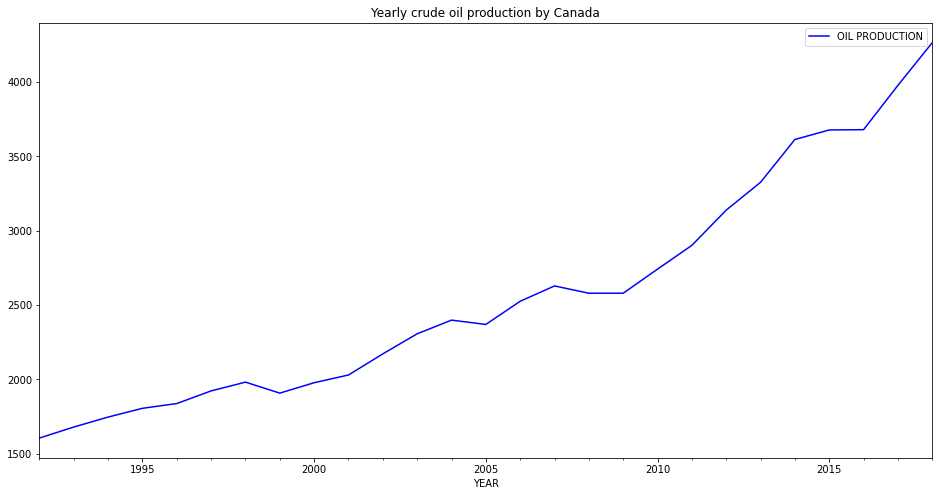

In [ ]:
ax = can.plot(color = 'blue', figsize = (16, 8))

ax.set_title('Yearly crude oil production by Canada')

plt.show()

**Observations:**
* The above plot shows that the oil production of Canada was increasing constantly from the early 1990s to the mid 2000s but has been increasing significantly since 2009 .
* The higher oil production can be due to increasing population, increasing the demand for transportation other needs and financial crisis.

### Decompose the above time series into its various components, i.e., `trend`, `seasonality`, and `white noise`. Since this is yearly frequency data, there would not be any `seasonal` patterns after decomposing the time series.

In [ ]:
# Using seasonal_decompose function to decompose the time series into its individual components
decomposition = sm.tsa.seasonal_decompose(can)

In [ ]:
# Creating an empty dataframe to store the individual components
decomposed_data = pd.DataFrame()

# Extracting the trend component of time series
decomposed_data['trend'] = decomposition.trend

# Extracting the seasonal component of time series
decomposed_data['seasonal'] = decomposition.seasonal

# Extracting the white noise or residual component of time series
decomposed_data['random_noise'] = decomposition.resid

Plotting the above three components in a single plot

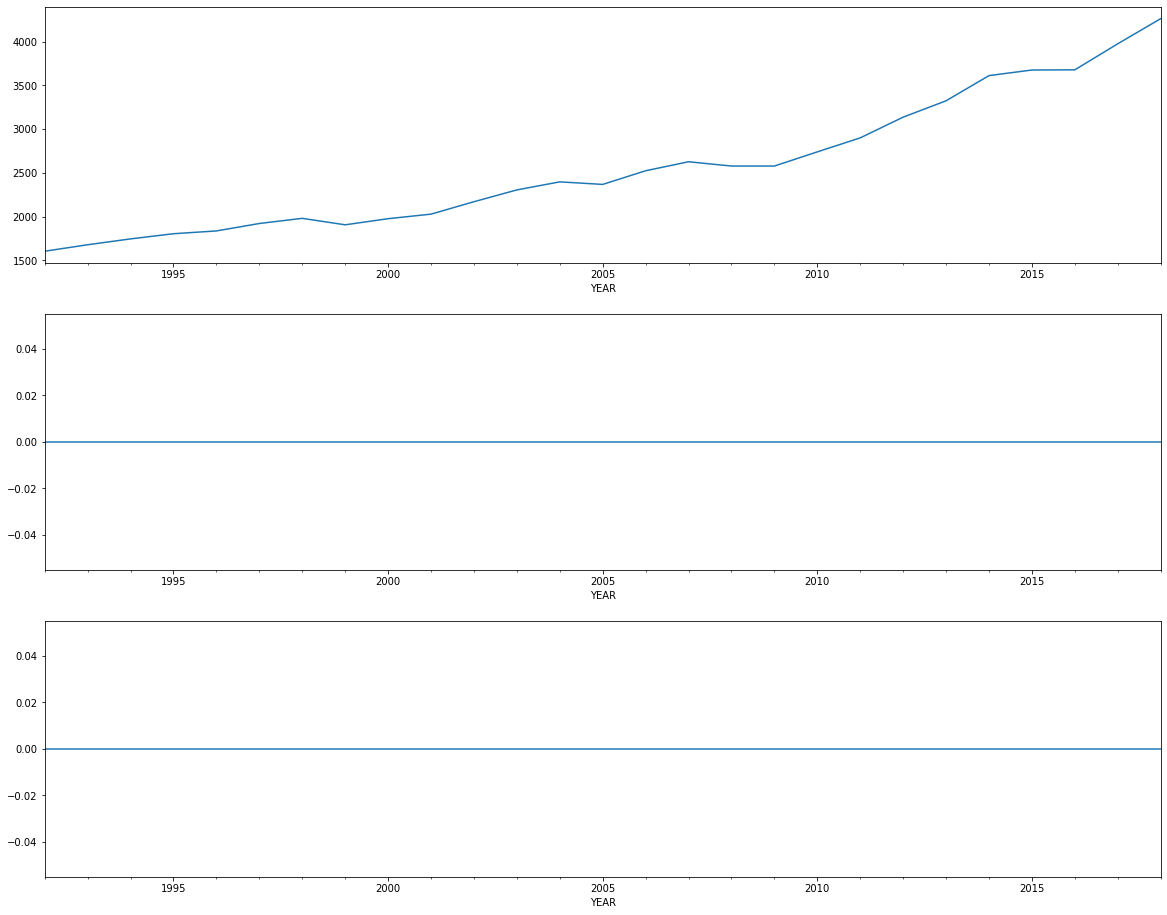

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 16))

decomposed_data['trend'].plot(ax = ax1)

decomposed_data['seasonal'].plot(ax = ax2)

decomposed_data['random_noise'].plot(ax = ax3)

As we can see from the above plot, the `seasonal` and `residual` components are zero, as this time series has a yearly frequency. 

## **Splitting the dataset**

In time series, the way we split the dataset is different from what we have seen so far. We cannot randomly split the dataset into train and test for time series datasets. In time series, we are trying the predict the outcome for a future point in time. If we split the dataset randomly, we might miss the actual lag component on which the data should be auto regressed.

**Split the time series dataset**

In [ ]:
# Using the first 20 years data as the training data
train_data = can.loc['1992-01-01' : '2012-01-01']

# Using the last 7 years data as the test data
test_data = can.loc['2012-01-01':]

**Visualize the train and the test data in the same plot**

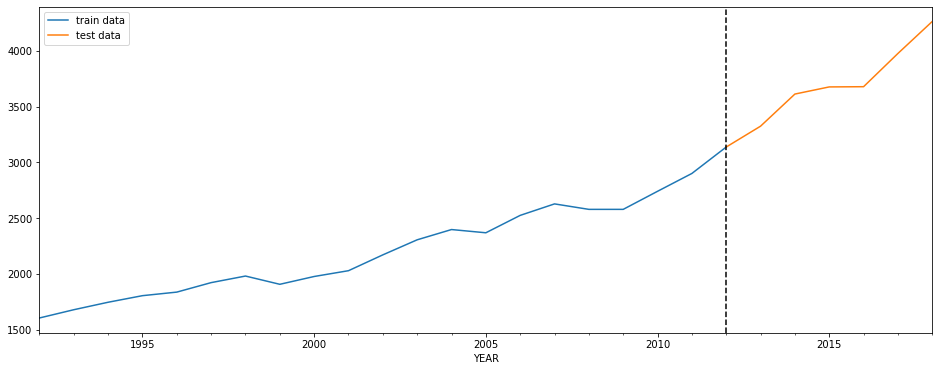

In [ ]:
# Creating a subplot space
fig, ax = plt.subplots(figsize = (16, 6))

# Plotting train data
train_data.plot(ax = ax)

# Plotting test data
test_data.plot(ax = ax)

# Adding the legends in sequential order
plt.legend(['train data', 'test data'])

# Showing the time which divides the original data into train and test
plt.axvline(x = '2012-01-01', color = 'black', linestyle = '--')

# Showing the plot
plt.show()

## **Checking for stationarity**

Before building a time series model, we need to make sure that the time series is stationary. If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models.

We can identify non-stationarity in the time series by performing Augmented Dicky-Fuller Test.

- **Null Hypothesis:** The time series is non stationary
- **Alternate Hypothesis:** The time series is stationary

In [ ]:
# Importing ADF test from statsmodels package
from statsmodels.tsa.stattools import adfuller

# Implementing ADF test on the original time series data
result = adfuller(train_data['OIL PRODUCTION'])

# Printing the results
print(result[0])

print(result[1]) # To get the p-value

print(result[4])

4.948542245213491
1.0
{'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


**Observations:**

* The p-value is 1, which is higher than 0.05. Hence, we fail to reject the null hypothesis, and we can say the time series is non-stationary. 
* We can also see this visually by comparing the above ADF statistic and visually inspecting the time series.

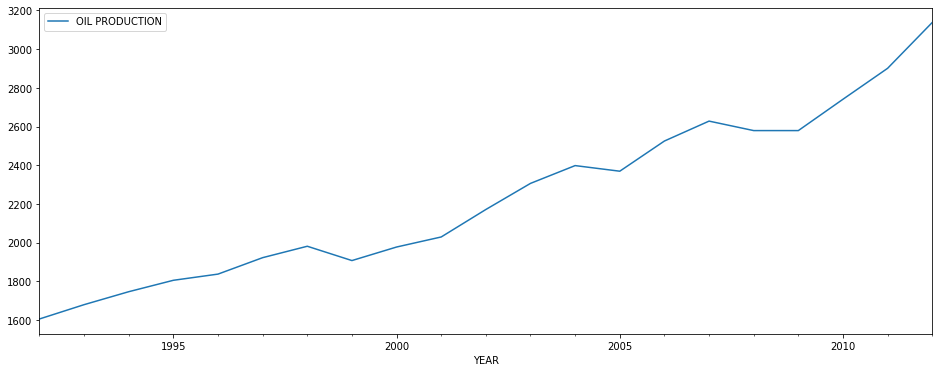

ADF Statistic: 4.948542245213491
p-value: 1.0


In [ ]:
# Implementing ADF test on the original time series data
result = adfuller(train_data['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

Take the 1st order difference of the data and check if it becomes stationary or not.

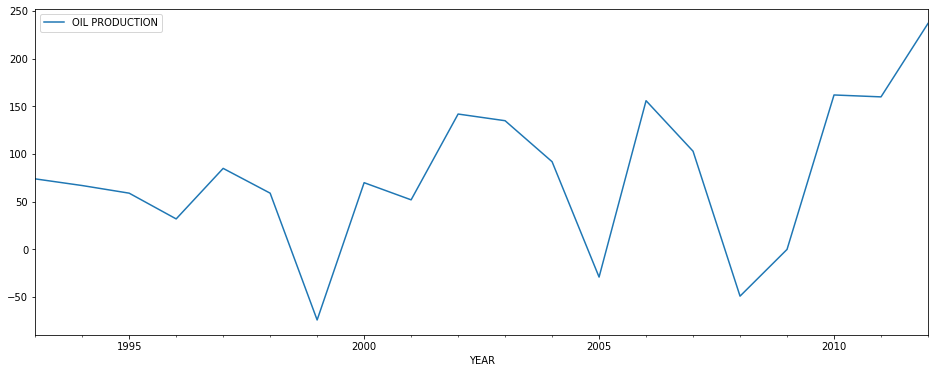

ADF Statistic: -1.1585630831869955
p-value: 0.6911621663711165


In [ ]:
# Taking the 1st order differencing of the timeseries
train_data_stationary = train_data.diff().dropna()

# Implementing ADF test on the first order differenced time series data
result = adfuller(train_data_stationary['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

**Observations:**
* The p-value is around 0.69, which is again higher than 0.05. Hence, we fail to reject the null hypothesis, and we can say the time series is non-stationary. Let's take the 2nd order differencing now and perform the same test.

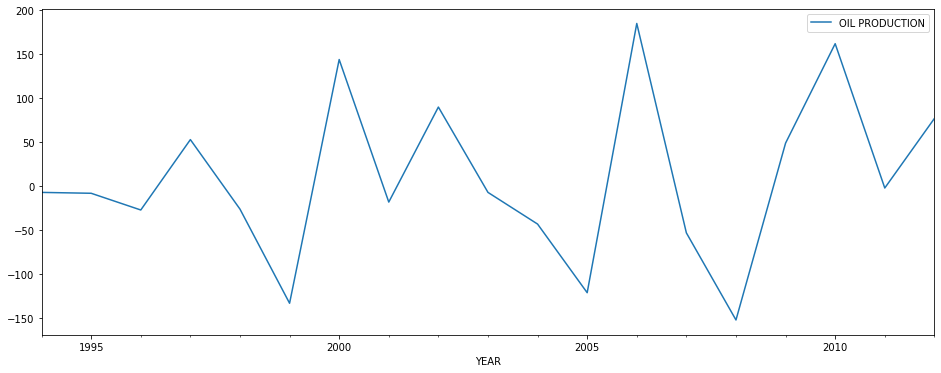

ADF Statistic: -6.7685257988121075
p-value: 2.6785182810402497e-09


In [ ]:
# Taking the 2nd order differencing of the time series
train_data_stationary = train_data.diff().diff().dropna()

# Implementing ADF test on the second order differenced time series data
result = adfuller(train_data_stationary['OIL PRODUCTION'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

Here, the p-value is less than 0.05 and we can say that after taking 2nd order differencing, the time series become stationary. Thus, in ARIMA model, d is equal to 2.

## **ACF and PACF Plots**

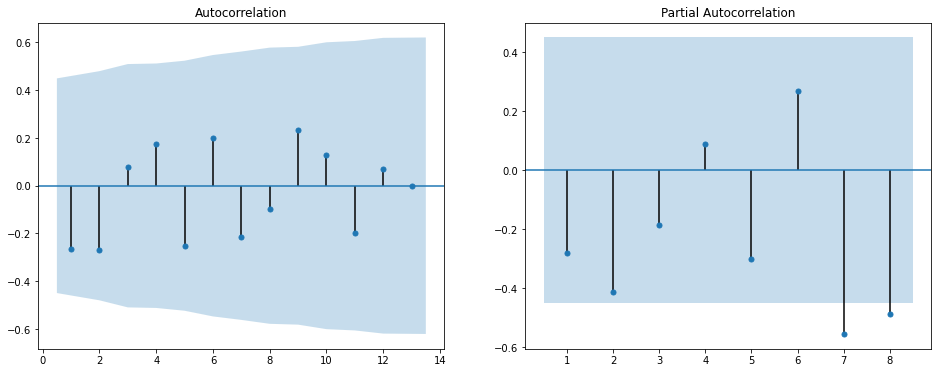

In [ ]:
# Creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# Creating and plotting the ACF charts starting from lag = 1
tsaplots.plot_acf(train_data_stationary, zero = False, ax = ax1)

# Creating and plotting the ACF charts starting from lag = 1 till lag = 8
tsaplots.plot_pacf(train_data_stationary, zero = False, ax = ax2, lags = 8)

plt.show()

From the above plots, it does not look like this stationary time series follows a pure AR or MA model. As none of the plots tails off or cuts off after any lag, it implies that the time series follows an ARMA or ARIMA model. So, to find out the optimal values of p, d, and q, we need to do a hyper-parameter search to find their optimal values.

The PACF seems to cut off at lag 3.

Below we will try several different modeling techniques on this time series:
- AR (p)
- MA (q)
- ARMA (p, q)
- ARIMA (p, d, q)

and then we will check which one performs better.

## **Evaluation Metrics**

## **AR Modeling**

Build four AR models at lags 1, 2, 3, and 4.

In [ ]:
# We are using the ARIMA function to build the AR model, so we need to pass the stationary time series that we got after double 
# differencing the original time series. Also, we will keep the q parameter as 0, so that the model acts as an AR model

# Creating an AR model with parameter p = 1
ar_1_model = ARIMA(train_data_stationary, order = (1, 0, 0))

# Creating an AR model with parameter p = 2
ar_2_model = ARIMA(train_data_stationary, order = (2, 0, 0))

# Creating an AR model with parameter p = 3
ar_3_model = ARIMA(train_data_stationary, order = (3, 0, 0))

# Creating an AR model with parameter p = 4
ar_4_model = ARIMA(train_data_stationary, order = (4, 0, 0))

In [ ]:
# Fitting all the models that we implemented in the above cell

ar_1_results = ar_1_model.fit()

ar_2_results = ar_2_model.fit()

ar_3_results = ar_3_model.fit()

ar_4_results = ar_4_model.fit()

**Inverse transform the time series data.**

In [ ]:
def plot_predicted_output(results, ax):
    
    # We are taking double cumulative sum of forecasted values (which is inverse of double differencing)
    # And we are also adding the last element of the training data to the forecasted values to get back to the original scale
    predictions = np.cumsum(np.cumsum(results.predict(start = 19, end = 25))) + train_data.iloc[-1][0]
    
    # Setting indices of the test data into prediction values
    predictions.index = test_data.index
    
    # Computing the AIC and RMSE metrics for the model and printing it into title of the plot
    train_data.plot(ax = ax, label = 'train', 
                    title = 'AIC: {}'.format(np.round(results.aic, 2)) + 
                           ' , ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_data, predictions)), 2)))
    
    # Plotting the test data
    test_data.plot(ax = ax) 
    
    # Plotting the forecasted data
    predictions.plot(ax = ax)
    
    # Adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])

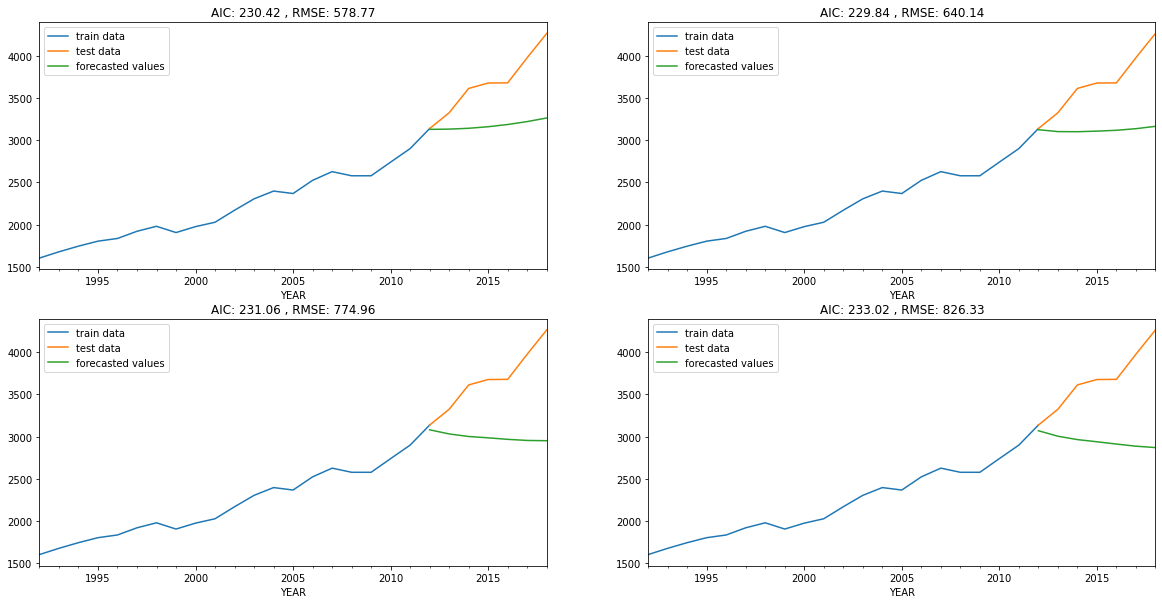

In [ ]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ar_1_results, ax1)

plot_predicted_output(ar_2_results, ax2)

plot_predicted_output(ar_3_results, ax3)

plot_predicted_output(ar_4_results, ax4)

plt.show()

As we can see from the above results, out of these four models we have developed, the AIC values for all these models are very much comparable or approximately the same. But if we check the RMSE values, it is the least for AR(1) or ARIMA(1, 0, 0) model, and it is significantly less than the other three models. Based on this analysis, AR(1) or ARIMA(1, 0, 0) looks the best model if we only want to use the AR component while modeling. 

**Check the model summary of this AR(1) or ARIMA(1, 0, 0) model.**

In [ ]:
ar_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   19
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -112.212
Date:                Tue, 04 Oct 2022   AIC                            230.424
Time:                        13:24:21   BIC                            233.257
Sample:                    01-01-1994   HQIC                           230.904
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1157     20.426      0.397      0.691     -31.919      48.151
ar.L1         -0.2589      0.349     -0.742      0.458      -0.942       0.425
sigma2      7862.3971   2809.720      2.798      0.005    2355.447    1.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.19
Prob(Q):                              0.61   Prob(JB):                         0.91
Heteroskedasticity (H):               2.40   Skew:                            -0.20
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So the equation for this model would be:

$$
y_{t}= 3.3255 - 0.4725 y_{t-1}  + \epsilon_{t}
$$

## **MA Modeling**

In [ ]:
# We are using the ARIMA function to build the MA model, so we need to pass the stationary time series that we got after double 
# differencing the original time series. Also, we will keep the p parameter as 0 so that the model acts as an MA model

# Creating MA model with parameter q = 1
ma_1_model = ARIMA(train_data_stationary, order = (0, 0, 1))

# Creating MA model with parameter q = 2
ma_2_model = ARIMA(train_data_stationary, order = (0, 0, 2))

# Creating MA model with parameter q = 3
ma_3_model = ARIMA(train_data_stationary, order = (0, 0, 3))

# Creating MA model with parameter q = 4
ma_4_model = ARIMA(train_data_stationary, order = (0, 0, 4))

In [ ]:
# Fitting all the models that we implemented in the above cell

ma_1_results = ma_1_model.fit()

ma_2_results = ma_2_model.fit()

ma_3_results = ma_3_model.fit()

ma_4_results = ma_4_model.fit()

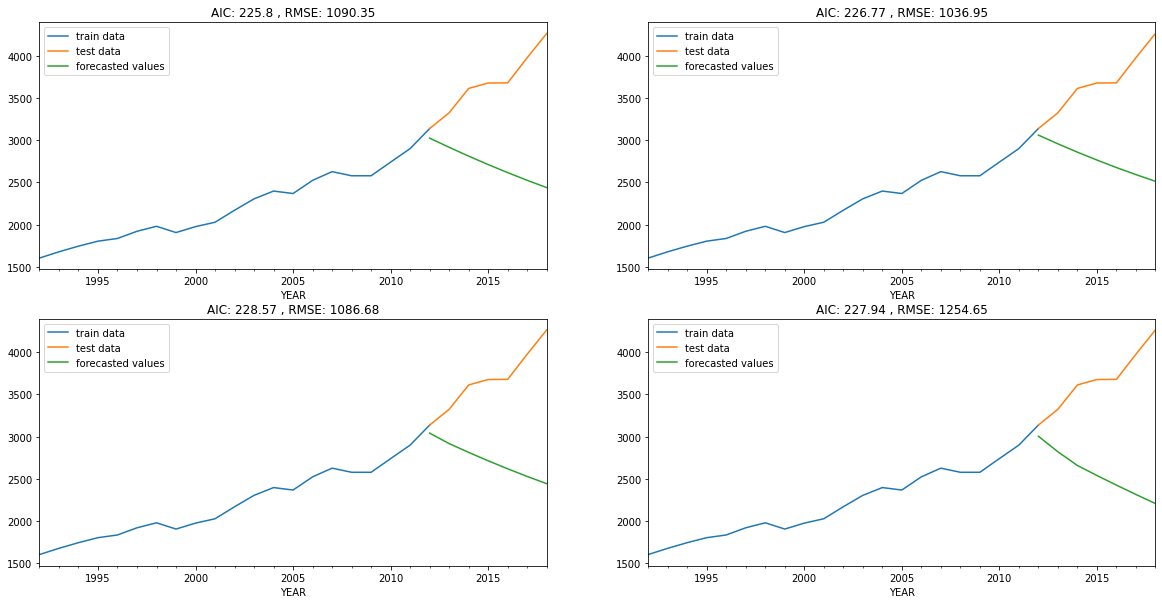

In [ ]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ma_1_results, ax1)

plot_predicted_output(ma_2_results, ax2)

plot_predicted_output(ma_3_results, ax3)

plot_predicted_output(ma_4_results, ax4)

plt.show()

As we can see from the above plots, again all the models that we have developed so far are comparable to AIC, but RMSE is significantly lower for MA(2) model in comparison to all the other models. So, the best model that we have got using MA modeling, is MA(2) or ARIMA(0, 0, 2).

**Analyze the model summary for MA(2) or ARIMA(0, 0, 2) below.**

In [ ]:
ma_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   19
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -109.385
Date:                Tue, 04 Oct 2022   AIC                            226.770
Time:                        13:24:26   BIC                            230.547
Sample:                    01-01-1994   HQIC                           227.409
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8016      5.185      0.926      0.354      -5.361      14.964
ma.L1         -0.7157     46.680     -0.015      0.988     -92.208      90.776
ma.L2         -0.2832     13.385     -0.021      0.983     -26.518      25.952
sigma2      5115.7654   2.39e+05      0.021      0.983   -4.64e+05    4.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.75   Prob(JB):                         0.73
Heteroskedasticity (H):               2.02   Skew:                            -0.36
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **ARMA Modeling**

In [ ]:
# We are using the ARIMA function here, so we need to pass stationary time series that we got after double differencing the original time series

# Creating an ARMA model with parameters p = 2 and q = 1
ar_2_ma_1_model = ARIMA(train_data_stationary, order = (2, 0, 1))

# Creating an ARMA model with parameters p = 2 and q = 2
ar_2_ma_2_model = ARIMA(train_data_stationary, order=(2, 0, 2))

# Creating an ARMA model with parameters p = 3 and q = 2
ar_3_ma_2_model = ARIMA(train_data_stationary, order = (3, 0, 2))

# Creating an ARMA model with parameters p = 2 and q = 3
ar_2_ma_3_model = ARIMA(train_data_stationary, order = (2, 0, 3))

In [ ]:
# Fitting all the models that we implemented in the above cell

ar_2_ma_1_results = ar_2_ma_1_model.fit()

ar_2_ma_2_results = ar_2_ma_2_model.fit()

ar_3_ma_2_results = ar_3_ma_2_model.fit()

ar_2_ma_3_results = ar_2_ma_3_model.fit()

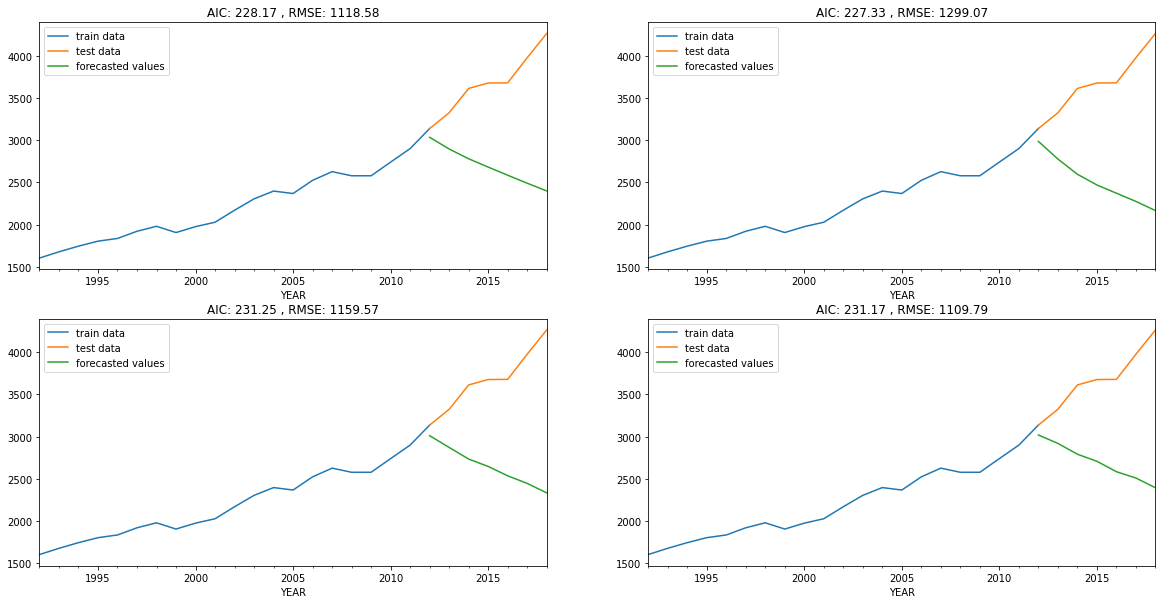

In [ ]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output(ar_2_ma_1_results, ax1)

plot_predicted_output(ar_2_ma_2_results, ax2)

plot_predicted_output(ar_3_ma_2_results, ax3)

plot_predicted_output(ar_2_ma_3_results, ax4)

plt.show()

As we can see from the above plots, again all the models that we have developed so far have comparable AIC, but for one specific model, i.e., ARIMA(2, 0, 2), the `RMSE` is significantly lower than the models that we have developed above. Also, it is evident from the above plots that the forecasted values from the model ARIMA(2, 0, 2) are closer to the test data in comparison to all the other models.

**Analyze the summary for the model ARIMA(2, 0, 2).**

In [ ]:
ar_2_ma_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   19
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -107.663
Date:                Tue, 04 Oct 2022   AIC                            227.326
Time:                        13:24:30   BIC                            232.993
Sample:                    01-01-1994   HQIC                           228.285
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3325      2.521      1.322      0.186      -1.608       8.273
ar.L1          0.7813      0.969      0.806      0.420      -1.118       2.680
ar.L2         -0.4772      0.278     -1.715      0.086      -1.022       0.068
ma.L1         -1.9599     18.126     -0.108      0.914     -37.487      33.567
ma.L2          0.9937     18.389      0.054      0.957     -35.048      37.035
sigma2      3347.3563   6.14e+04      0.055      0.957   -1.17e+05    1.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.05
Prob(Q):                              0.63   Prob(JB):                         0.97
Heteroskedasticity (H):               1.85   Skew:                             0.01
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **ARIMA Modeling**

In [ ]:
train_data = train_data.astype('float32')

In [ ]:
# Creating an ARIMA model with parameters p = 2, d = 2 and q = 1
ar_2_d_2_ma_1_model = ARIMA(train_data, order = (2, 2, 1))

# Creating an ARIMA model with parameters p = 1, d = 2 and q = 2
ar_1_d_2_ma_2_model = ARIMA(train_data, order = (1, 2, 2))

# Creating an ARIMA model with parameters p = 2, d = 2 and q = 2
ar_2_d_2_ma_2_model = ARIMA(train_data, order = (2, 2, 2))

# Creating an ARIMA model with parameters p = 3, d = 2 and q = 2
ar_3_d_2_ma_2_model = ARIMA(train_data, order = (3, 2, 2))

In [ ]:
# Fitting all the models that we implemented in the above cell

ar_2_d_2_ma_1_results = ar_2_d_2_ma_1_model.fit()

ar_1_d_2_ma_2_results = ar_1_d_2_ma_2_model.fit()

ar_2_d_2_ma_2_results = ar_2_d_2_ma_2_model.fit()

ar_3_d_2_ma_2_results = ar_3_d_2_ma_2_model.fit()

In [ ]:
def plot_predicted_output_new(results, ax):
    
    predictions = results.predict(start = 19, end = 25)
    
    # Setting indices of the test data into prediction values
    predictions.index = test_data.index
    
    # Computing the AIC and RMSE metrics for the model and printing it into title of the plot
    train_data.plot(ax = ax, label = 'train', 
                    
                    title = 'AIC: {}'.format(np.round(results.aic, 2)) + 
                           ' , ' +
                           'RMSE: {}'.format(np.round(np.sqrt(mean_squared_error(test_data, predictions)), 2)))
    
    # Plotting the test data
    test_data.plot(ax = ax) 
    
    # Plotting the forecasted data
    predictions.plot(ax = ax)
    
    # Adding the legends sequentially
    ax.legend(['train data', 'test data', 'forecasted values'])

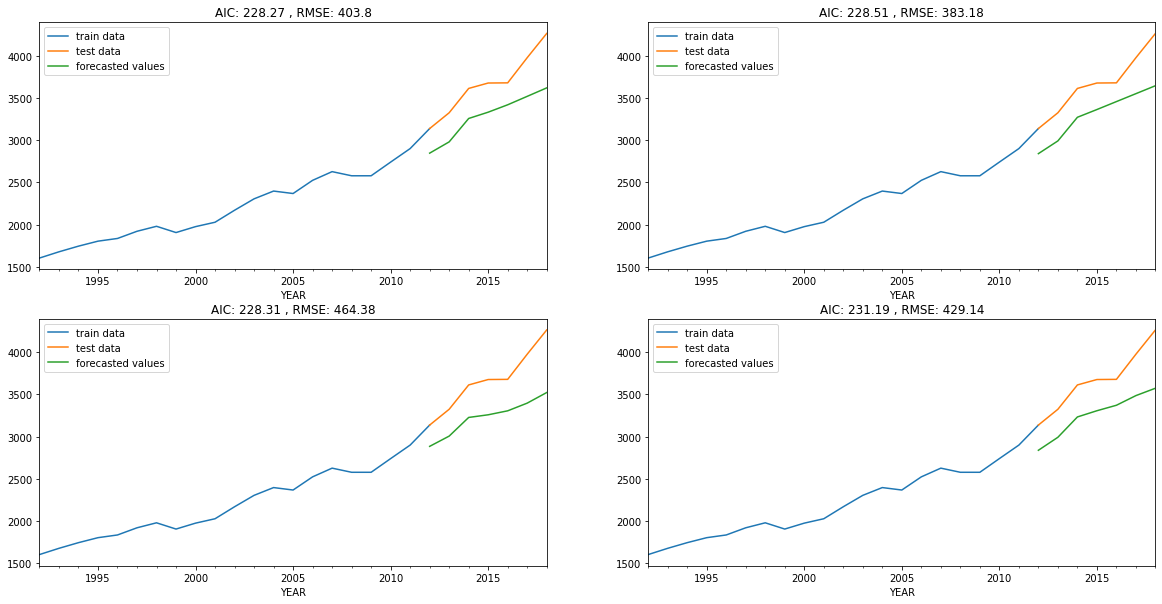

In [ ]:
# Plotting the forecasted values along with train and test for all the models

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 10))

plot_predicted_output_new(ar_2_d_2_ma_1_results, ax1)

plot_predicted_output_new(ar_1_d_2_ma_2_results, ax2)

plot_predicted_output_new(ar_2_d_2_ma_2_results, ax3)

plot_predicted_output_new(ar_3_d_2_ma_2_results, ax4)

plt.show()

From the above analysis, we can see that the ARIMA(1, 2, 2) is the best model in comparison to others, as it has comparable AIC to other models and less RMSE in comparison to all the other models.

**Analyze the model summary for ARIMA(1, 2, 2).**

In [ ]:
ar_1_d_2_ma_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         OIL PRODUCTION   No. Observations:                   21
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -110.257
Date:                Tue, 04 Oct 2022   AIC                            228.514
Time:                        13:24:31   BIC                            232.292
Sample:                    01-01-1992   HQIC                           229.153
                         - 01-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0574      1.209     -0.047      0.962      -2.427       2.312
ma.L1         -0.5478      1.447     -0.379      0.705      -3.384       2.288
ma.L2         -0.3280      0.746     -0.439      0.660      -1.791       1.135
sigma2      5981.2945   2527.909      2.366      0.018    1026.684    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.84   Prob(JB):                         0.83
Heteroskedasticity (H):               2.73   Skew:                            -0.09
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Now that we have identified the best parameters (p, d, and q) for our data. Let's train the model with the same parameters on the full data for Canada and get the forecasts for the next 7 years, i.e., from 2023-01-01 to 2030-01-01.**

In [ ]:
final_model = ARIMA(can, order = (1, 2, 2))

final_model_results = final_model.fit()

In [ ]:
forecasted_ARIMA = final_model_results.predict(start = '2023-01-01', end = '2030-01-01')

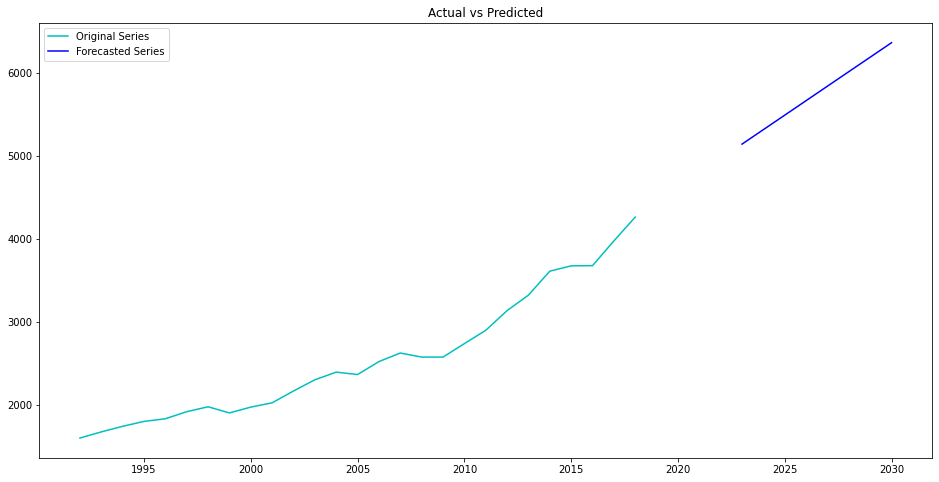

In [ ]:
# Plotting the original time seris with forecast

plt.figure(figsize = (16, 8))

plt.plot(can, color = 'c', label = 'Original Series')

plt.plot(forecasted_ARIMA, label = 'Forecasted Series', color = 'b')

plt.title('Actual vs Predicted')

plt.legend()

plt.show()

- The above plot shows that the model is able to identify the trend in the data and forecast the values accordingly. 
- The forecast indicates that, according to the historic data, the oil production is going to constantly increase for Canada.

## **Auto ARIMA**

Alternatively, we can also model this time series `automatically`, without needing to go through all the steps that we have gone through so far. In the below piece of code, when we pass the training data, it automatically finds the best parameters for you and then model the time series as shown below.

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.9 MB/s 
     |████████████████████████████████| 9.8 MB 51.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pmdarima as pm

auto_arima_model = pm.auto_arima(train_data, d = 2, seasonal = False, trace = True, 
                                 error_action = 'ignore', suppress_warnings = True)

print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=227.501, Time=0.60 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=229.773, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=230.436, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=227.937, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=232.187, Time=0.24 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.41 sec

Best model:  ARIMA(2,2,2)(0,0,0)[0] intercept
Total fit time: 3.728 seconds
      

The auto-arima model is also giving out the best model as - `ARIMA(2, 2, 2)(0, 0, 0)[0]`, which is different from what we have chosen earlier. 

**We can also plot and analyze the model diagnostics for residuals as shown below**

If the residuals are normally distributed and are uncorrelated to each other, then we actually have a good model.

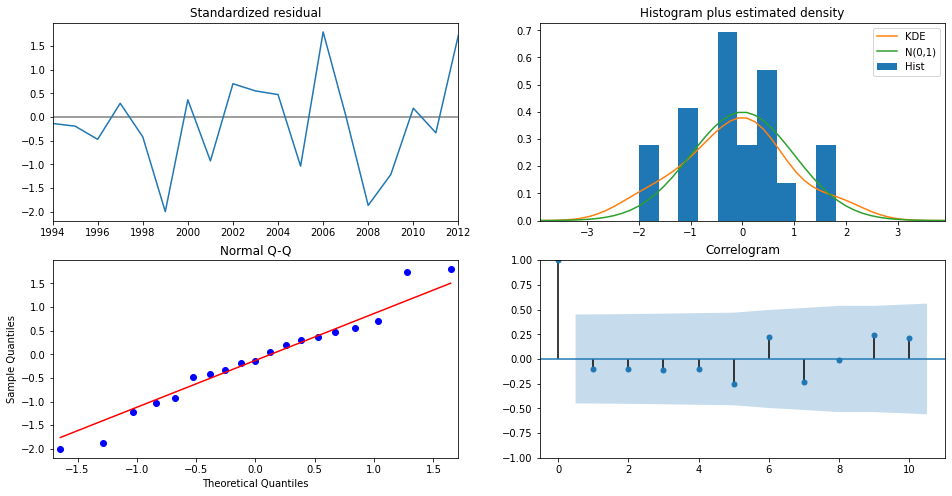

In [ ]:
fig = plt.figure(figsize = (16, 8))

fig = auto_arima_model.plot_diagnostics(fig = fig)

**Observations:**

- **Standardized residual**: The residual errors tend to fluctuate around a mean of zero and have a approximately uniform variance.

- **Histogram plus estimated density**: The density plot suggests that the distribution of residuals is very close to a standard normal distribution.

- **Normal Q-Q**: The distribution of residuals is skewed as not all the dots should fall perfectly in line with the red line.

- **Correlogram**: The ACF plot shows the residual errors are not autocorrelated as no lag other than 0 is significant. Any autocorrelation would imply that there is some pattern in the residual errors that is not explained by the model.

In [ ]:
pred=pd.DataFrame(auto_arima_model.predict(n_periods=20),index=test_data.index)
pred.columns=['predictions']
pred

,predictions
YEAR,
2012-01-01,NaN
2013-01-01,3222.689684
2014-01-01,3249.837028
2015-01-01,3306.499405
2016-01-01,3415.736362
2017-01-01,3554.302259
2018-01-01,3693.125674


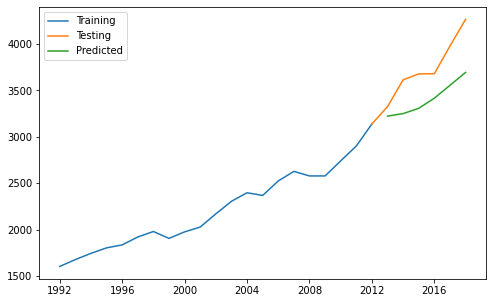

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Testing')
plt.plot(pred,label='Predicted')
plt.legend(loc='Left corner')
plt.show()

## **Conclusion**

 - We have built different types of models using search for the optimal parameters for each. We have compared all the models based on the evaluation metrics AIC and RMSE.
 - The AIC for all the models is approximately the same, for example, there is no significant difference in the AIC values for all the models. However, we can see significant difference in some of the models in terms of RMSE. So, the choice of model is more dependent on RMSE for the current data.
 - The model ARIMA(1, 2, 2) has given the best results and we have used the same to forecast the oil production for Canada.
 - In addition, we forecast a steady rise in Canadian oil productions over the next seven years from 2023 to 2030.